In [1]:
from Recursive_CCL import RCCL
from Two_Step_CCL import TSCCL
from image_equalizer import eq

import cv2
import numpy as np
import matplotlib.pyplot as plt

root = 'test_images/'

labirent = cv2.imread(root + 'labirent.pgm', 0)
semboller = cv2.imread(root + 'semboller.pgm', 0)

In [2]:
def two_image_graph(img1, img2, name1, name2, cmap='gray'):
    images, names = [img1, img2], [name1, name2]
    fig, ax = plt.subplots(2, 2, figsize=(14, 12))
    for i in range(2):
        hist = np.histogram(images[i].flatten(), range=[0, 256], bins=256)[0]
        cdf = np.cumsum(hist)
        cdf_normalized = cdf * hist.max() / cdf.max()
        
        ax[i, 0].imshow(images[i], cmap=cmap)
        ax[i, 0].set_title('Image: \'{}\''.format(names[i]))
        ax[i, 0].axis('off')
        ax[i, 1].hist(images[i].flatten(), range=[0, 256], bins=256, color='brown')
        ax[i, 1].plot(cdf_normalized, color='blue')
        ax[i, 1].set_title('Histogram: \'{}\''.format(names[i]))
        ax[i, 1].legend(('cdf','histogram'), loc = 'upper left')
      
    plt.show()

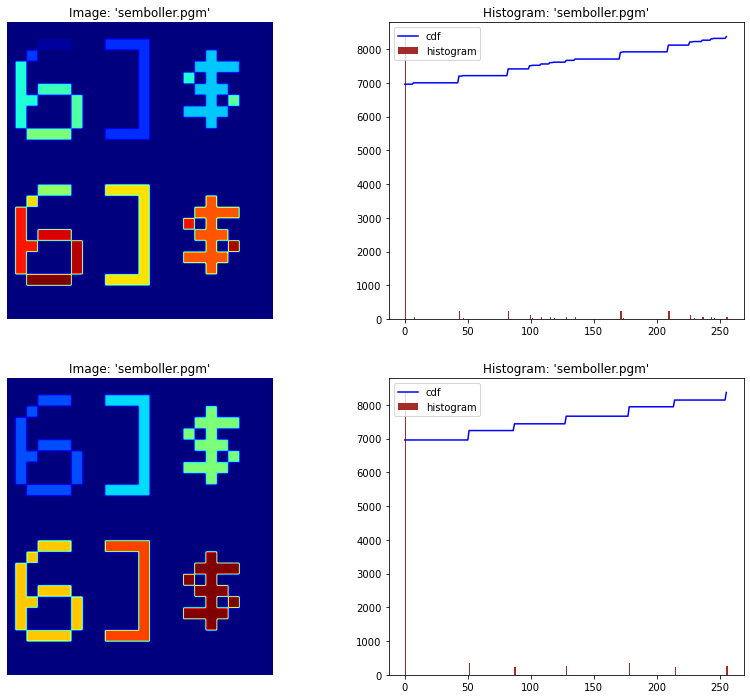

In [3]:
semboller_RCCL1 = RCCL(semboller, Nsize=4).result()
semboller_RCCL2 = RCCL(semboller, Nsize=8).result()

two_image_graph(eq(semboller_RCCL1), eq(semboller_RCCL2), 'semboller.pgm', 'semboller.pgm', cmap='jet')

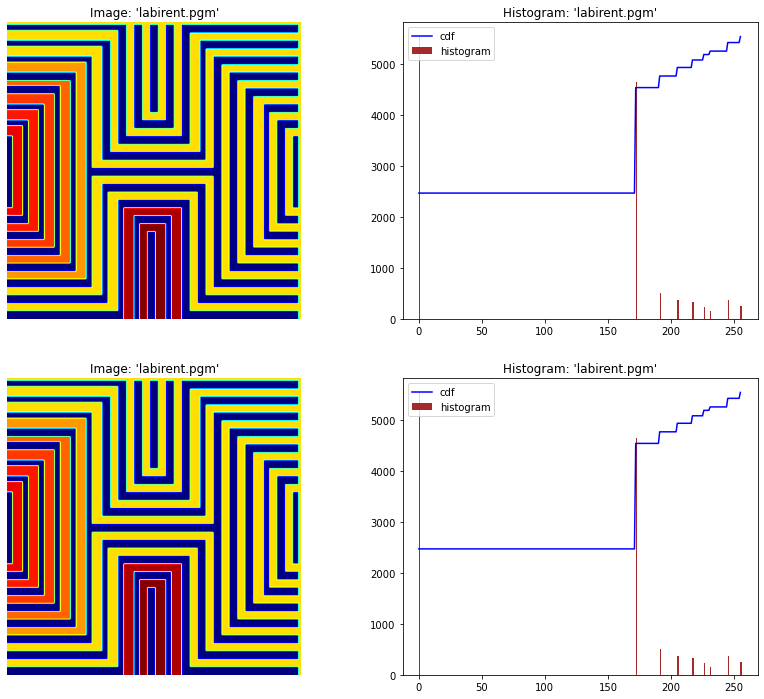

In [4]:
labirent_RCCL1 = RCCL(labirent, Nsize=4).result()
labirent_RCCL2 = RCCL(labirent, Nsize=8).result()

two_image_graph(eq(labirent_RCCL1), eq(labirent_RCCL2), 'labirent.pgm', 'labirent.pgm', cmap='jet')

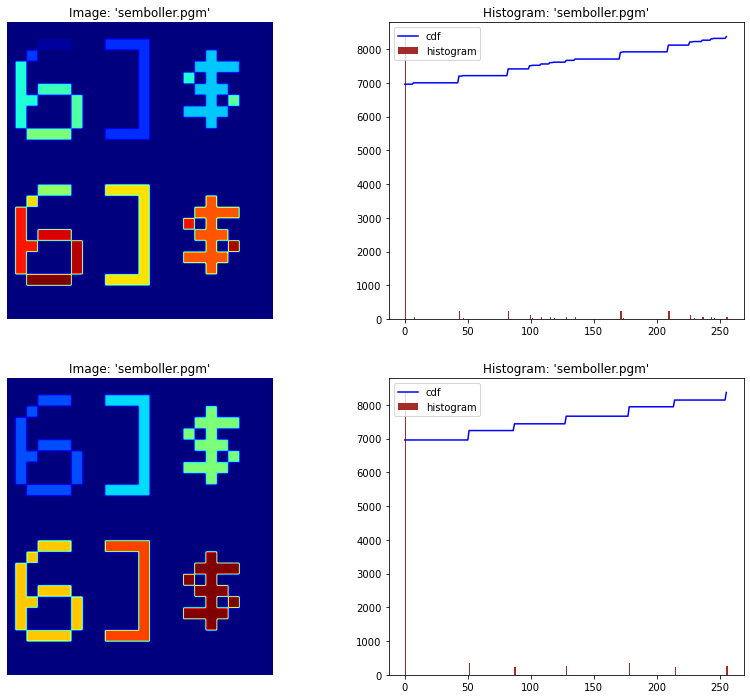

In [5]:
semboller_TSCCL1 = TSCCL(semboller, Nsize=4).result()
semboller_TSCCL2 = TSCCL(semboller, Nsize=8).result()

two_image_graph(eq(semboller_TSCCL1), eq(semboller_TSCCL2), 'semboller.pgm', 'semboller.pgm', cmap='jet')

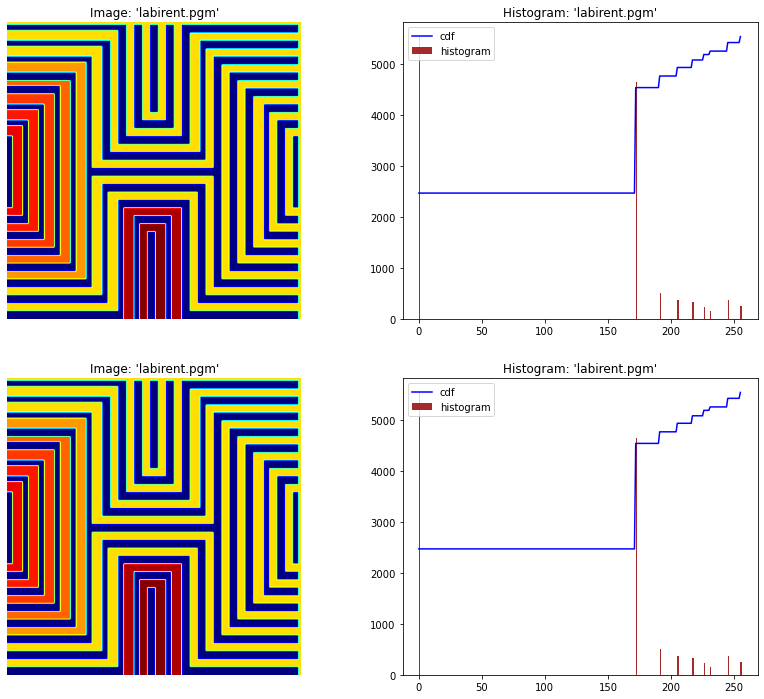

In [6]:
labirent_TSCCL1 = TSCCL(labirent, Nsize=4).result()
labirent_TSCCL2 = TSCCL(labirent, Nsize=8).result()

two_image_graph(eq(labirent_TSCCL1), eq(labirent_TSCCL2), 'labirent.pgm', 'labirent.pgm', cmap='jet')